# Retail Sales Time Series Analysis and Forecasting

This project implements a comprehensive analysis of retail sales data to identify trends, patterns, and forecast future sales. The analysis includes data preprocessing, exploratory data analysis, and time series forecasting using various models.

## Getting Started

### Prerequisites
- Python 3.x
- Required packages: listed in `requirements.txt`

### Installation

1. Clone the repository:
```bash
git clone https://github.com/KhayredineG/rev_wave.git
cd rev_wave
```

2. Create and activate a virtual environment:
```bash
python -m venv .venv
.venv\Scripts\activate  # On Windows
source .venv/bin/activate  # On Unix/MacOS
```

3. Install required packages:
```bash
pip install -r requirements.txt
```

4. Download the dataset from [Kaggle Store Sales Competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) and place the following files in the `data` directory:
   - train.csv
   - stores.csv
   - oil.csv
   - holidays_events.csv

## Project Structure
- `notebooks/`: Jupyter notebooks for analysis
  - `sales_analysis.ipynb`: Main analysis notebook
- `data/`: Directory for dataset files (not included in repository due to size)
- `requirements.txt`: Python package dependencies

## Analysis Overview

The analysis includes:
1. Data Preprocessing and Cleaning
2. Exploratory Data Analysis
3. Time Series Decomposition
4. Forecasting using SARIMA and Holt-Winters models

## Key Findings

1. Sales Trends:
   - Clear upward trend from 2013 to 2017
   - Strong seasonal patterns
   - Holiday periods show significant sales increases

2. Store Performance:
   - Type D stores show highest overall sales
   - Different store types show varying seasonal patterns
   - Location impacts sales performance

3. Product Categories:
   - GROCERY I is the top-selling category
   - Clear hierarchy in product family performance

4. Forecasting Results:
   - SARIMA model outperforms Holt-Winters
   - Model captures both trend and seasonality
   - Reliable short-term predictions

## Authors
- KhayredineG

## 1. Setup and Library Imports

Let's import all the required libraries and set up our environment.

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set plotting style
plt.style.use('seaborn-v0_8')  # Updated style name
sns.set_theme()  # Modern way to set seaborn style

# Ignore warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Initial Inspection

In this section, we'll load the retail sales dataset and perform initial data inspection. You'll need to download a retail sales dataset (e.g., from Kaggle) and place it in the `data` directory before running this section.

## 2. Data Loading and Initial Inspection

We'll load and combine data from multiple CSV files:
1. `train.csv` - Daily sales data
2. `stores.csv` - Store metadata
3. `oil.csv` - Daily oil price data
4. `holidays_events.csv` - Holidays and events data

Let's load each file and examine their contents.

In [6]:
# Load all dataset files
train_df = pd.read_csv('c:/Users/Khayredine/rev_wave/data/train.csv')
stores_df = pd.read_csv('c:/Users/Khayredine/rev_wave/data/stores.csv')
oil_df = pd.read_csv('c:/Users/Khayredine/rev_wave/data/oil.csv')
holidays_df = pd.read_csv('c:/Users/Khayredine/rev_wave/data/holidays_events.csv')

# Display basic information about each dataset
print("Training Data Info:")
print("-" * 50)
print(train_df.info())
print("\nFirst few rows of training data:")
display(train_df.head())

print("\nStores Data Info:")
print("-" * 50)
print(stores_df.info())
print("\nFirst few rows of stores data:")
display(stores_df.head())

print("\nOil Price Data Info:")
print("-" * 50)
print(oil_df.info())
print("\nFirst few rows of oil price data:")
display(oil_df.head())

print("\nHolidays Data Info:")
print("-" * 50)
print(holidays_df.info())
print("\nFirst few rows of holidays data:")
display(holidays_df.head())

# Check for missing values in all datasets
print("\nMissing values in Training Data:")
print(train_df.isnull().sum())
print("\nMissing values in Stores Data:")
print(stores_df.isnull().sum())
print("\nMissing values in Oil Price Data:")
print(oil_df.isnull().sum())
print("\nMissing values in Holidays Data:")
print(holidays_df.isnull().sum())

Training Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

First few rows of training data:


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0



Stores Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None

First few rows of stores data:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4



Oil Price Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

First few rows of oil price data:


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20



Holidays Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

First few rows of holidays data:


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False



Missing values in Training Data:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing values in Stores Data:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values in Oil Price Data:
date           0
dcoilwtico    43
dtype: int64

Missing values in Holidays Data:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


## 3. Data Cleaning and Preprocessing

Now we'll clean the data by handling missing values, converting data types, and removing any anomalies.

In [7]:
# Convert date columns to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

# Merge datasets
# First, merge training data with store information
df = train_df.merge(stores_df, on='store_nbr', how='left')

# Add oil price information
df = df.merge(oil_df[['date', 'dcoilwtico']], on='date', how='left')

# Add holiday information
holidays_df['holiday'] = 1
holidays_simple = holidays_df[['date', 'holiday']].drop_duplicates()
df = df.merge(holidays_simple, on='date', how='left')
df['holiday'] = df['holiday'].fillna(0)

# Handle missing values
# Fill missing oil prices using forward fill method
df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill')

# Remove any remaining rows with missing values
df.dropna(inplace=True)

# Set date as index
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

print("Dataset after merging and cleaning:")
print("-" * 50)
display(df.head())

print("\nDataset shape:", df.shape)
print("\nMissing values after cleaning:")
print("-" * 50)
display(df.isnull().sum())

Dataset after merging and cleaning:
--------------------------------------------------


,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday
date,,,,,,,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,93.14,0.0
2013-01-02,1783,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,0.0
2013-01-02,1784,1,BEAUTY,2.0,0,Quito,Pichincha,D,13,93.14,0.0
2013-01-02,1785,1,BEVERAGES,1091.0,0,Quito,Pichincha,D,13,93.14,0.0
2013-01-02,1786,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,0.0



Dataset shape: (2999106, 11)

Missing values after cleaning:
--------------------------------------------------


id             0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dcoilwtico     0
holiday        0
dtype: int64

## 4. Feature Engineering

Let's create new features that will be useful for our analysis and modeling.

In [8]:
# Create time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek
df['Quarter'] = df.index.quarter

# Calculate sales metrics
df['total_sales'] = df['sales'] * df['onpromotion']  # Sales considering promotions

# Create store-specific features
store_avg_sales = df.groupby('store_nbr')['sales'].transform('mean')
df['store_performance'] = df['sales'] / store_avg_sales

# Create family (product category) specific features
family_avg_sales = df.groupby('family')['sales'].transform('mean')
df['family_performance'] = df['sales'] / family_avg_sales

# Calculate rolling metrics (7-day and 30-day)
df['sales_7d_avg'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7, min_periods=1).mean())
df['sales_30d_avg'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30, min_periods=1).mean())

print("Dataset with new features:")
print("-" * 50)
display(df.head())

print("\nFeature information:")
print("-" * 50)
df.info()

Dataset with new features:
--------------------------------------------------


,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday,Year,Month,DayOfWeek,Quarter,total_sales,store_performance,family_performance,sales_7d_avg,sales_30d_avg
date,,,,,,,,,,,,,,,,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,93.14,0.0,2013,1,2,1,0.0,0.007853,0.327608,2.0,2.0
2013-01-02,1783,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,0.0,2013,1,2,1,0.0,0.000000,0.000000,0.0,0.0
2013-01-02,1784,1,BEAUTY,2.0,0,Quito,Pichincha,D,13,93.14,0.0,2013,1,2,1,0.0,0.007853,0.537937,2.0,2.0
2013-01-02,1785,1,BEVERAGES,1091.0,0,Quito,Pichincha,D,13,93.14,0.0,2013,1,2,1,0.0,4.283704,0.457020,1091.0,1091.0
2013-01-02,1786,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,0.0,2013,1,2,1,0.0,0.000000,0.000000,0.0,0.0



Feature information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2999106 entries, 2013-01-02 to 2017-08-15
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  int64  
 1   store_nbr           int64  
 2   family              object 
 3   sales               float64
 4   onpromotion         int64  
 5   city                object 
 6   state               object 
 7   type                object 
 8   cluster             int64  
 9   dcoilwtico          float64
 10  holiday             float64
 11  Year                int32  
 12  Month               int32  
 13  DayOfWeek           int32  
 14  Quarter             int32  
 15  total_sales         float64
 16  store_performance   float64
 17  family_performance  float64
 18  sales_7d_avg        float64
 19  sales_30d_avg       float64
dtypes: float64(8), int32(4), int64(4), object(4)
memory usage: 434.7+ MB

## 5. Exploratory Data Analysis

Let's create various visualizations to understand the patterns in our data.

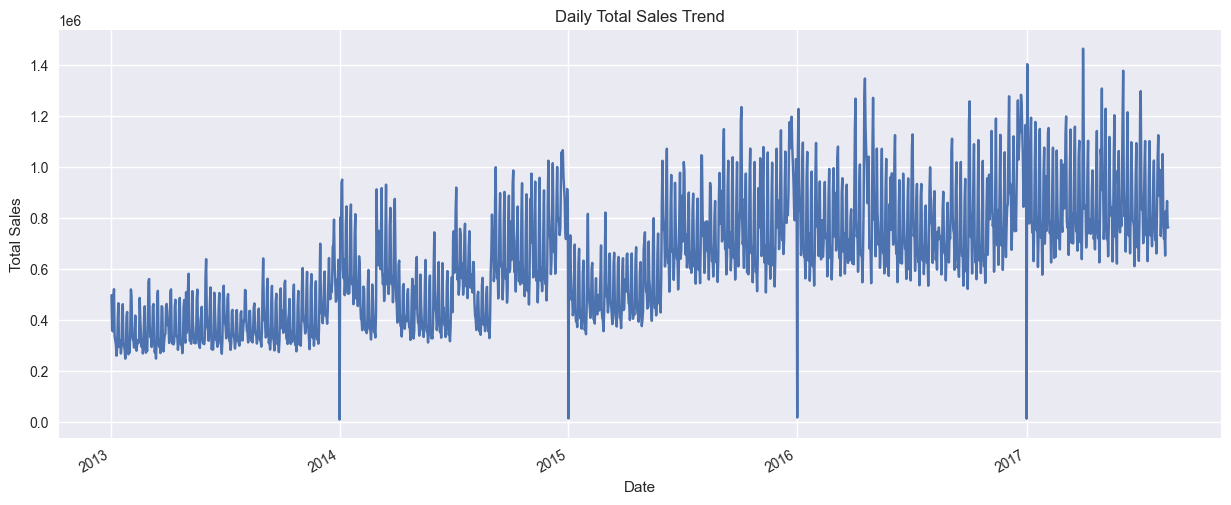

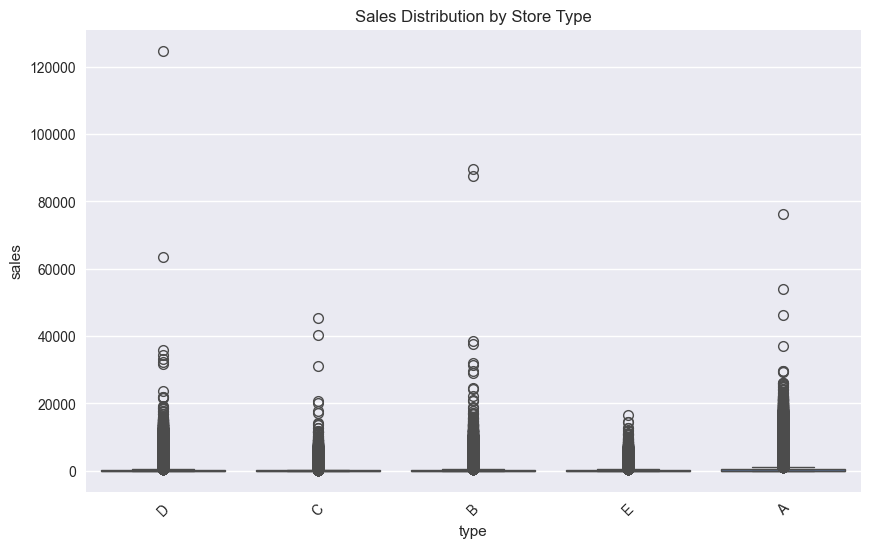

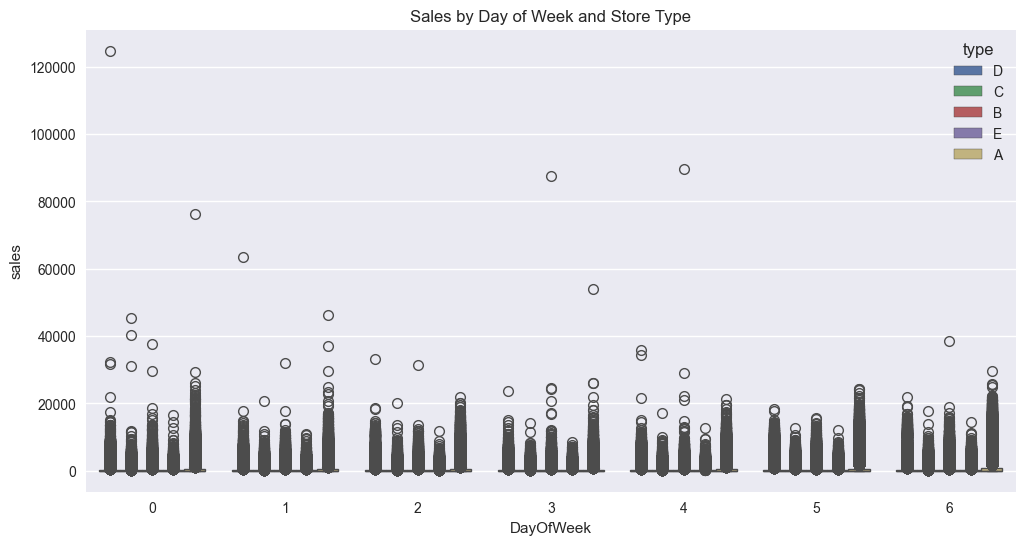

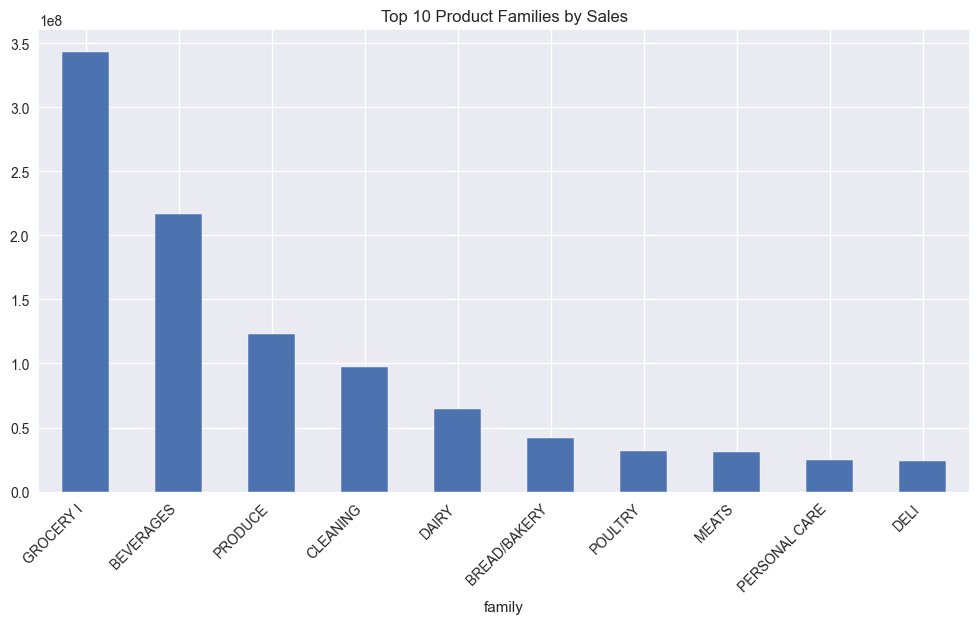

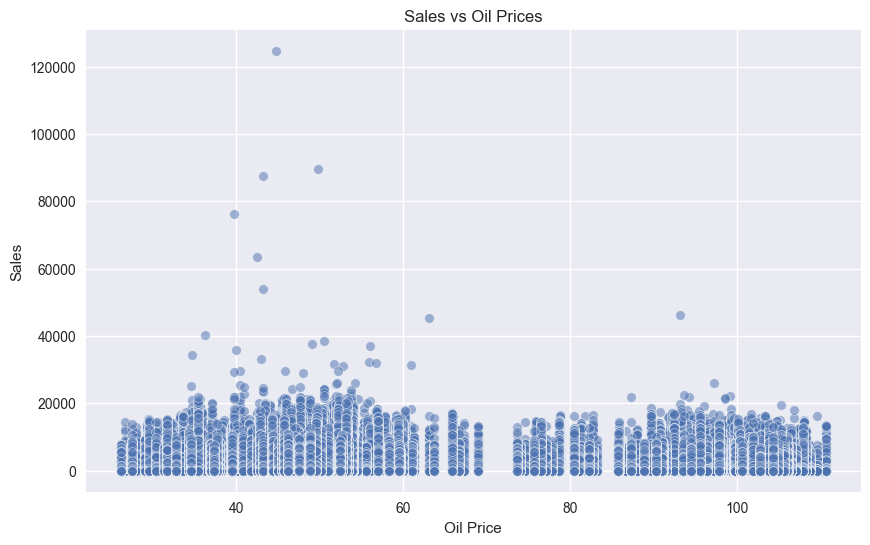

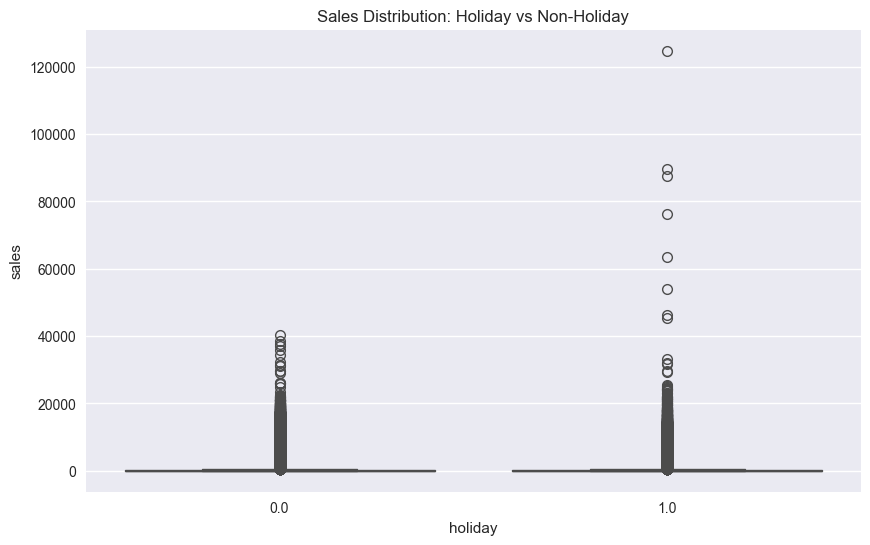

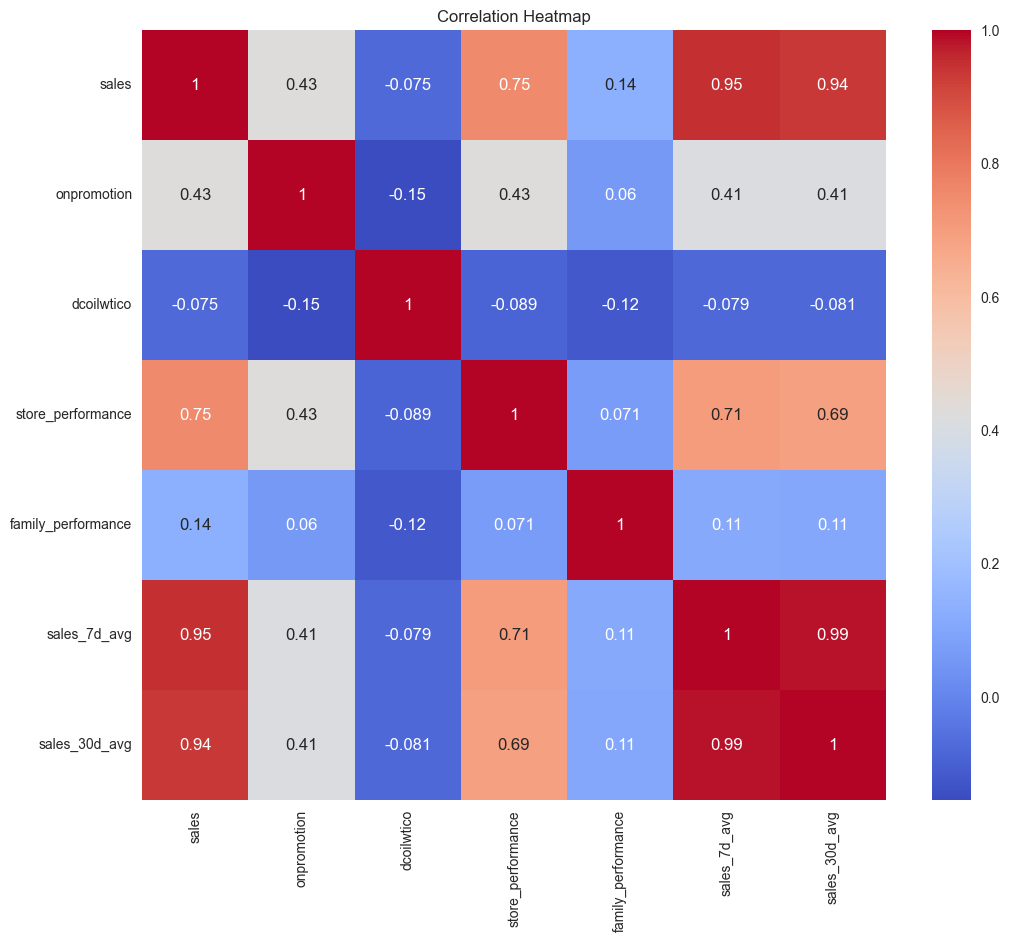

In [10]:
# Set up the plotting parameters
plt.style.use('seaborn-v0_8')  # Updated style name
plt.rcParams['figure.figsize'] = (15, 10)

# Plot 1: Daily Total Sales Trend
daily_sales = df.groupby('date')['sales'].sum()
plt.figure(figsize=(15, 6))
daily_sales.plot()
plt.title('Daily Total Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Plot 2: Average Sales by Store Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='sales', data=df)
plt.title('Sales Distribution by Store Type')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Sales by Day of Week and Store Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='sales', hue='type', data=df)
plt.title('Sales by Day of Week and Store Type')
plt.show()

# Plot 4: Top 10 Product Families by Sales
top_families = df.groupby('family')['sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_families.plot(kind='bar')
plt.title('Top 10 Product Families by Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 5: Correlation between Sales and Oil Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dcoilwtico', y='sales', alpha=0.5)
plt.title('Sales vs Oil Prices')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

# Plot 6: Impact of Holidays on Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='sales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.show()

# Plot 7: Correlation Heatmap of Numeric Features
numeric_cols = ['sales', 'onpromotion', 'dcoilwtico', 'store_performance', 
                'family_performance', 'sales_7d_avg', 'sales_30d_avg']
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 6. Time Series Decomposition

Let's decompose our time series into trend, seasonal, and residual components.

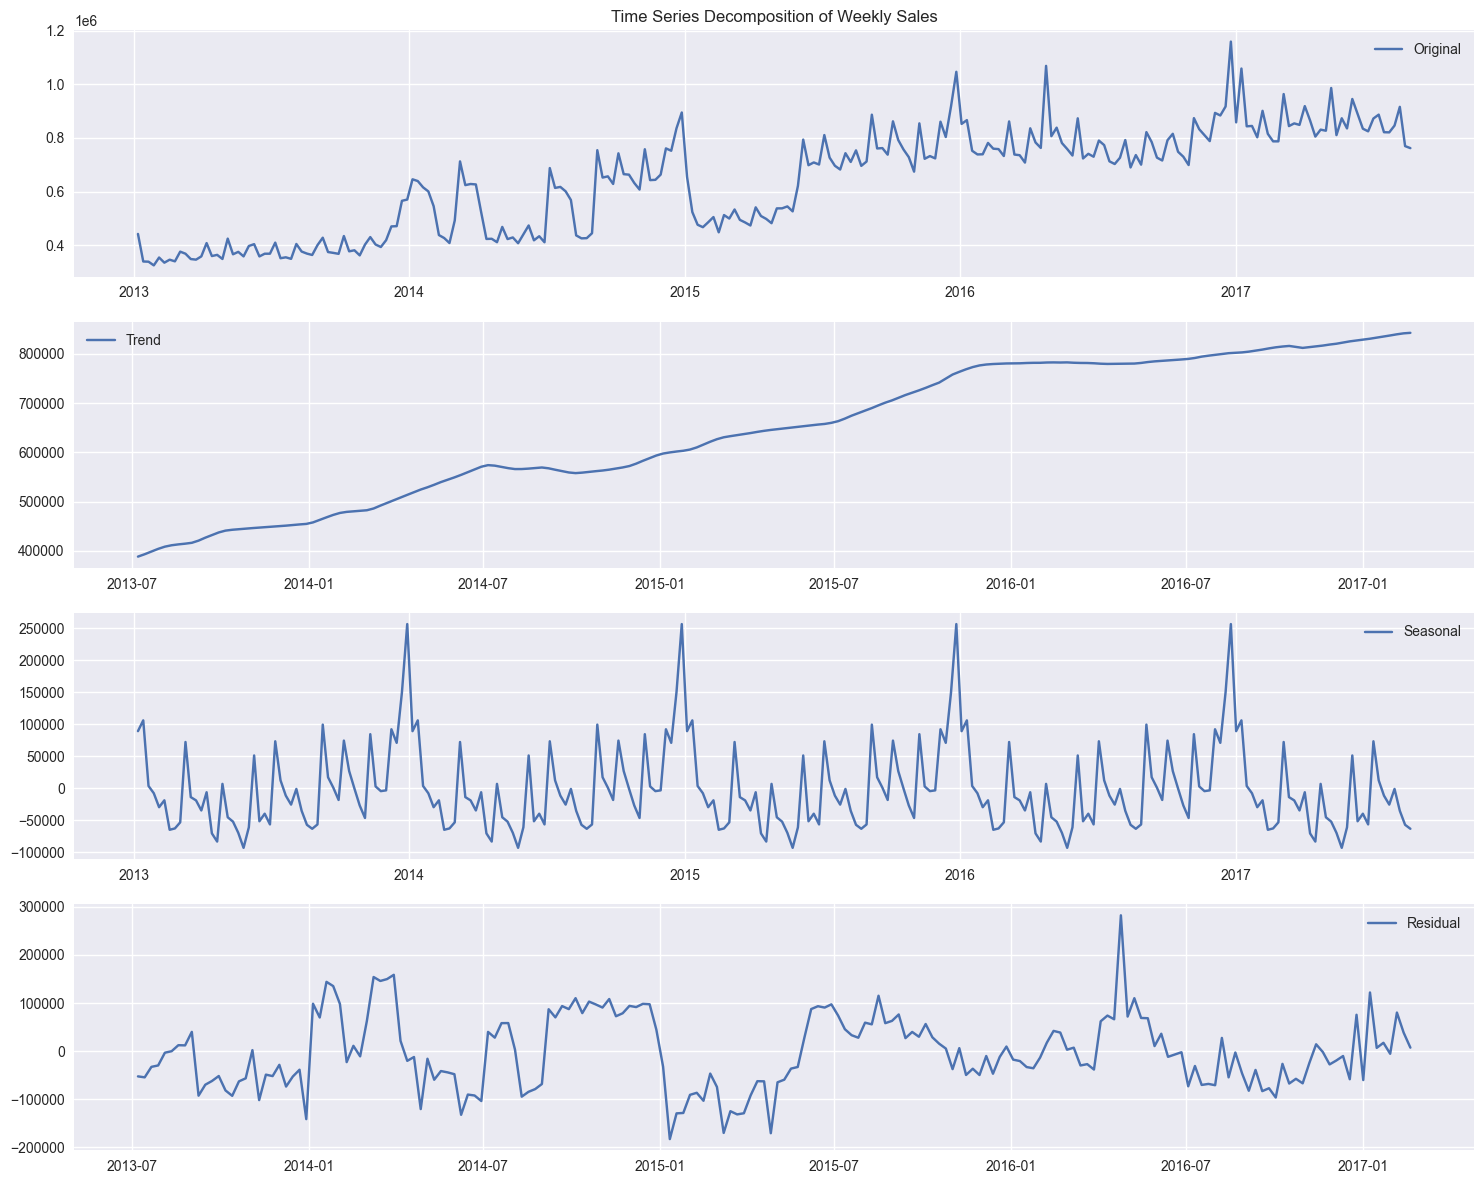

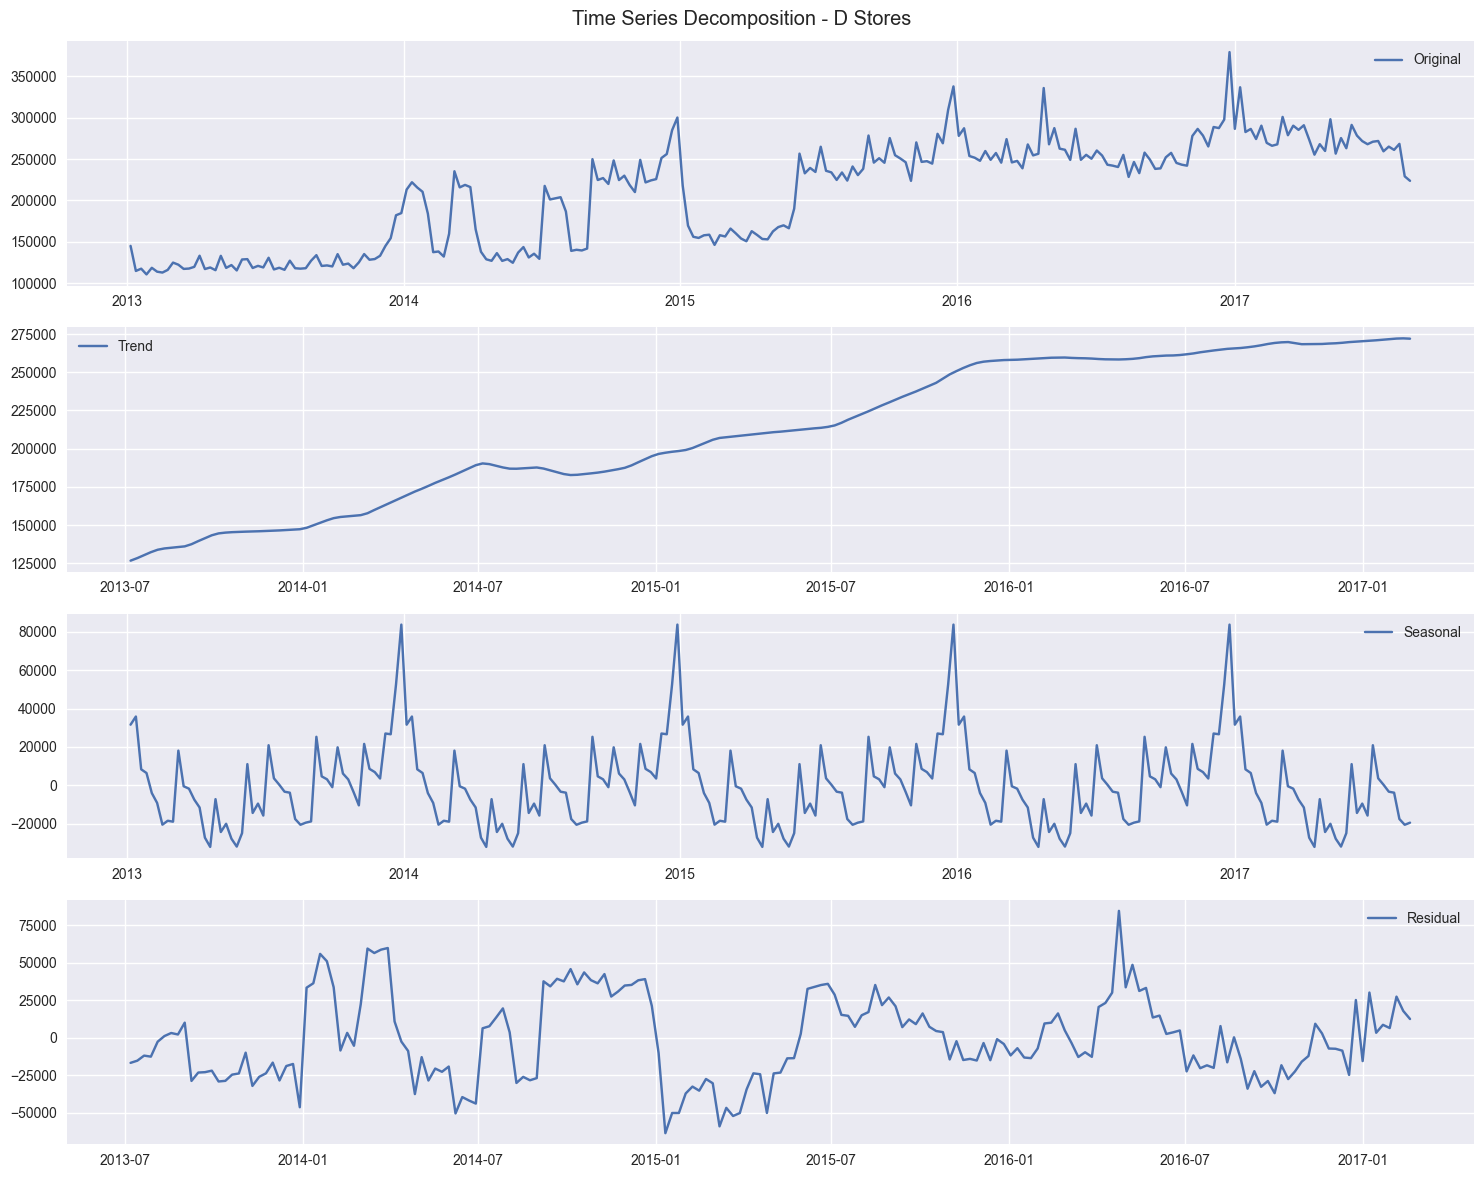

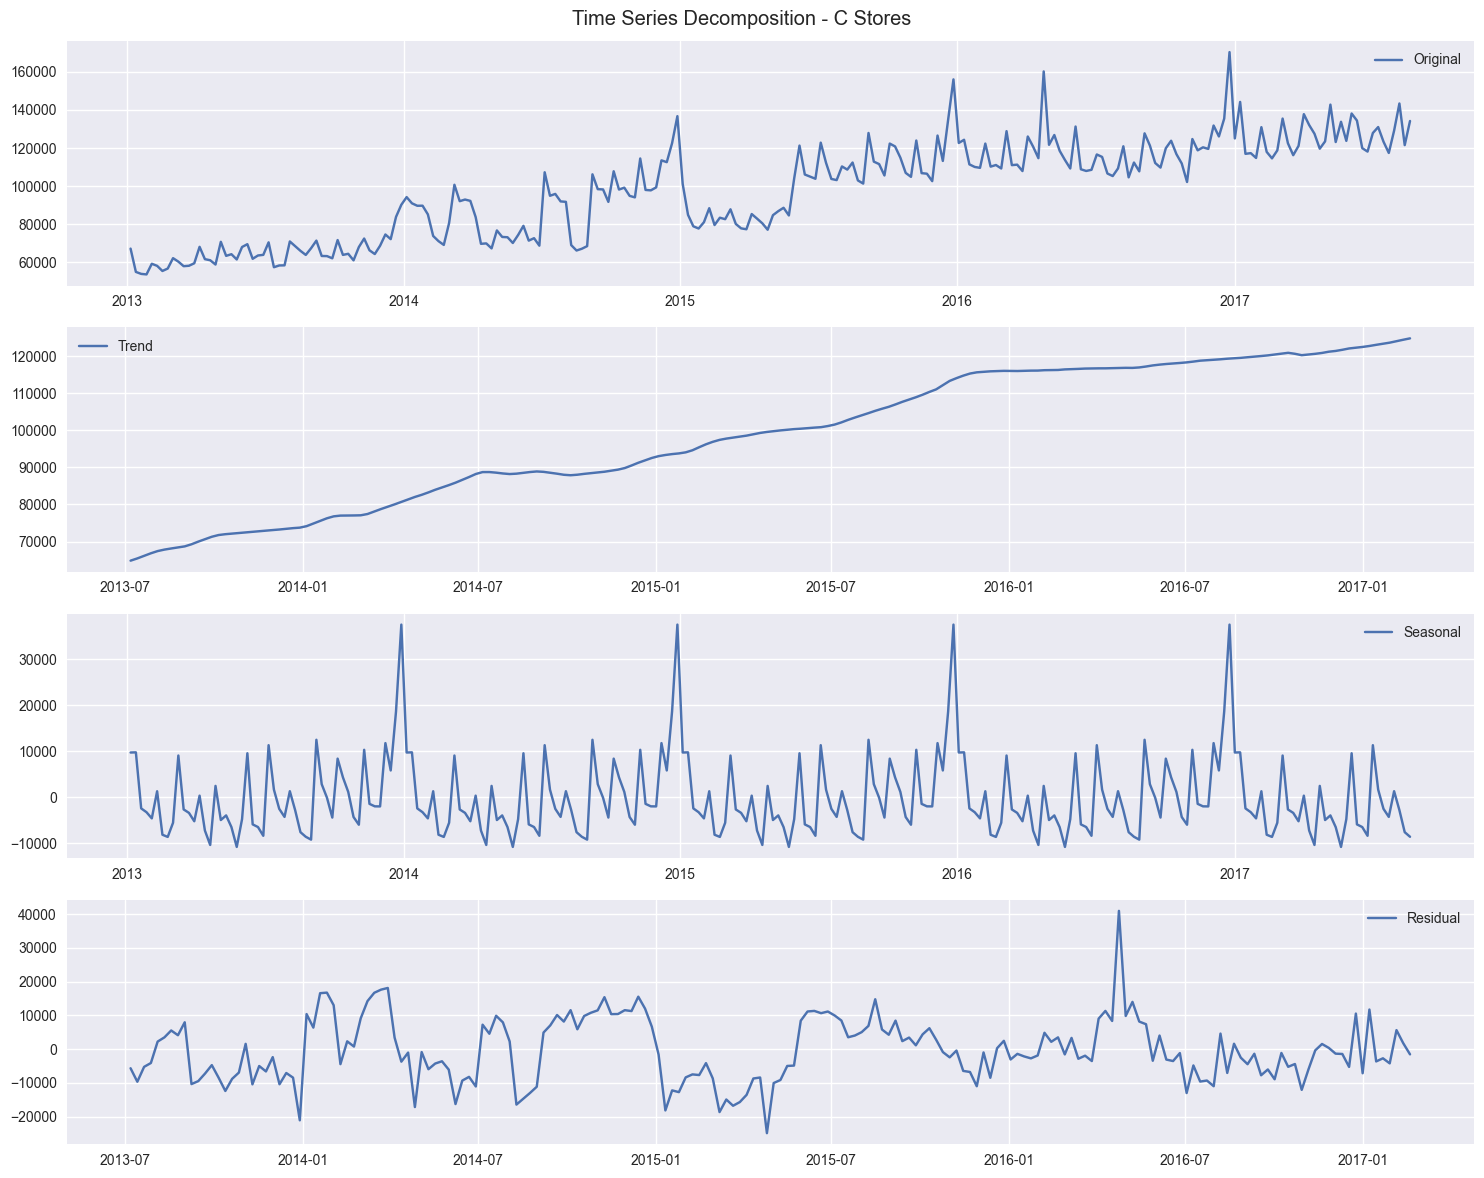

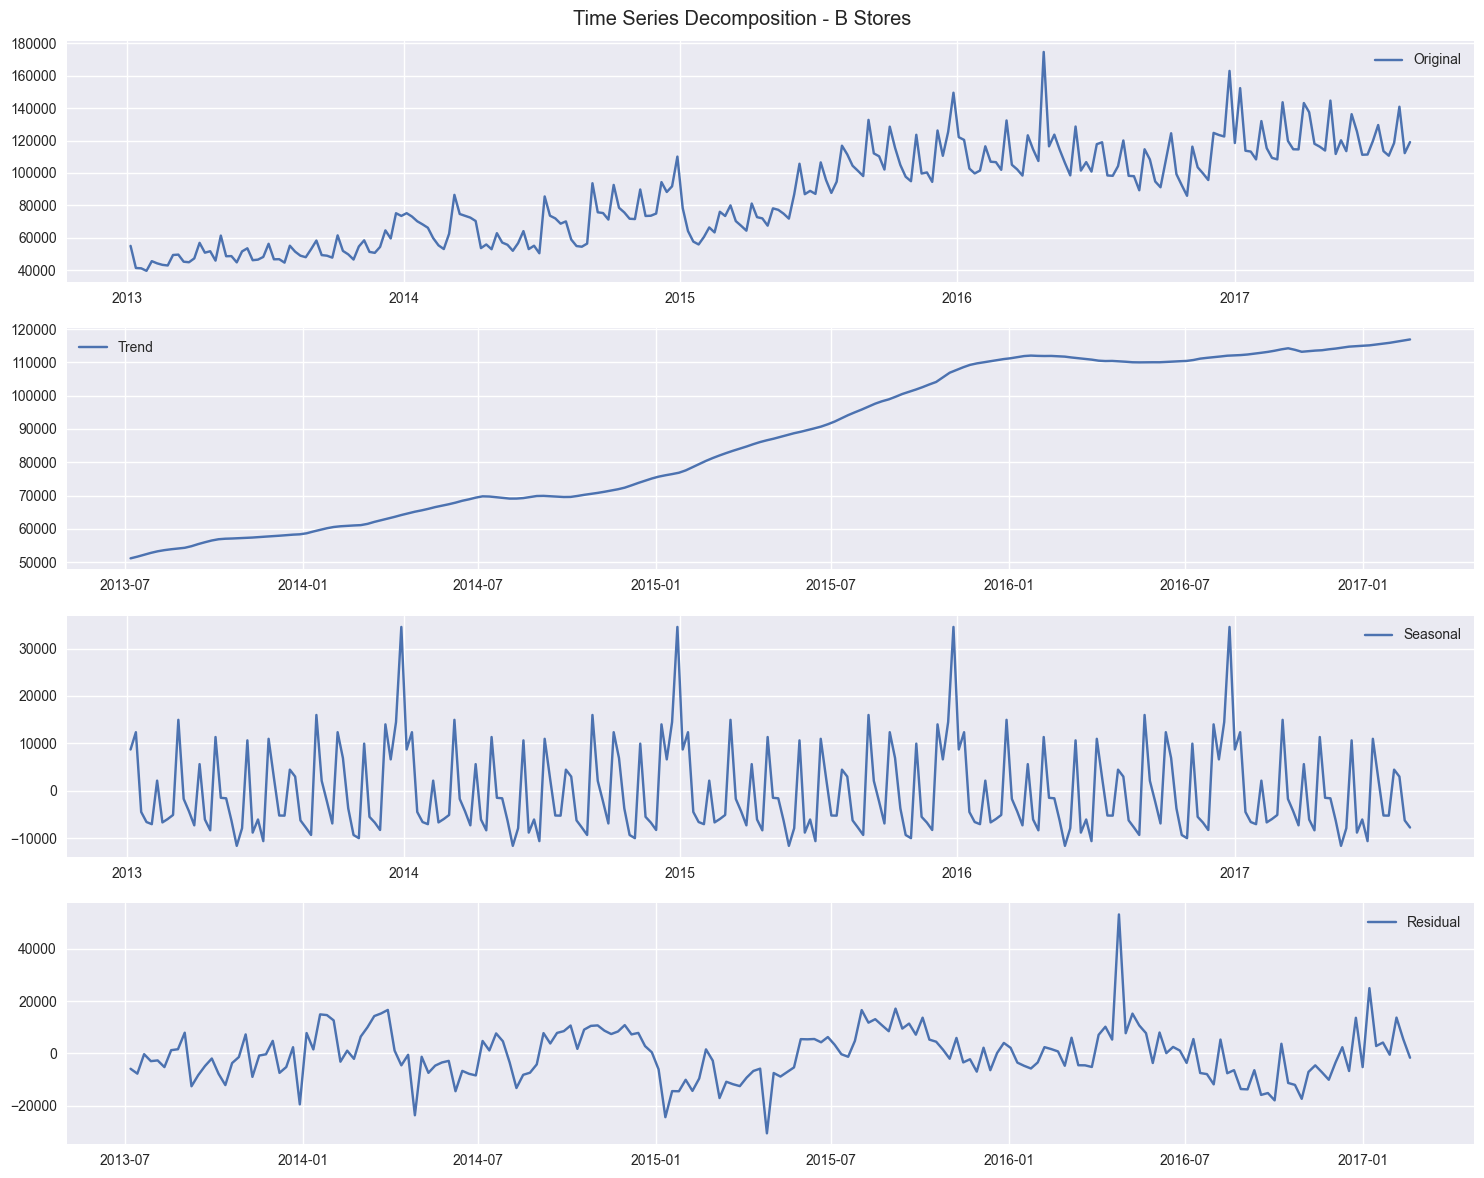

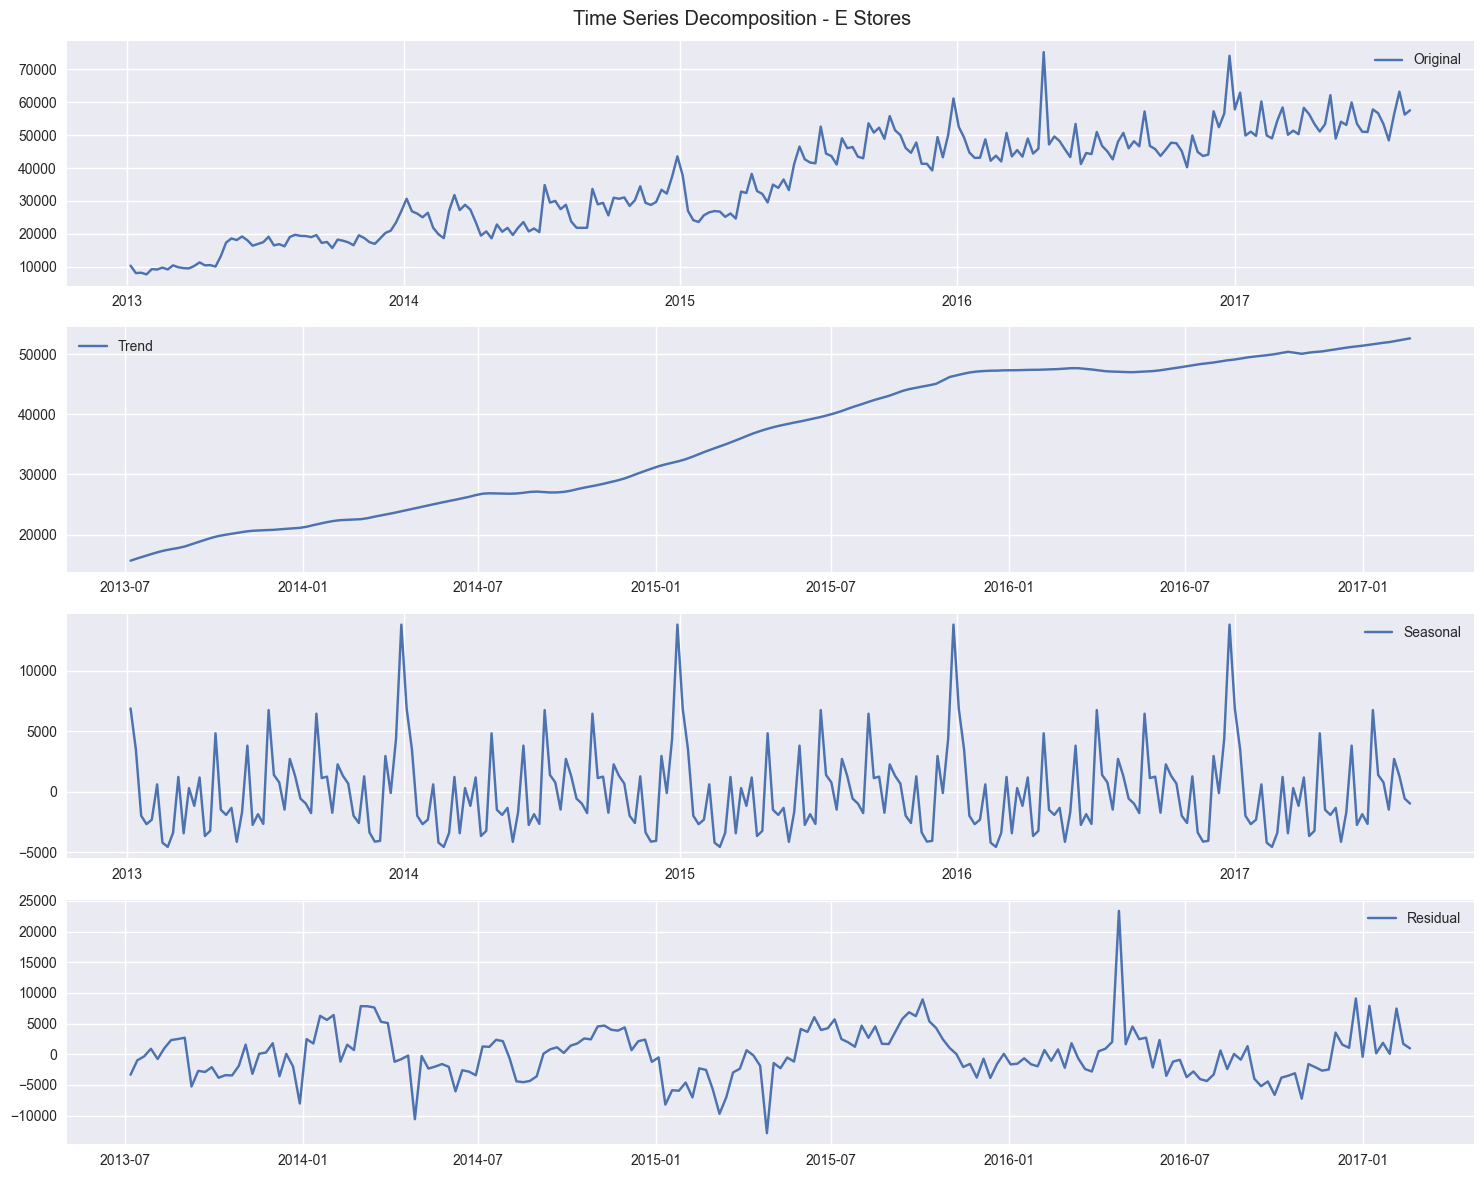

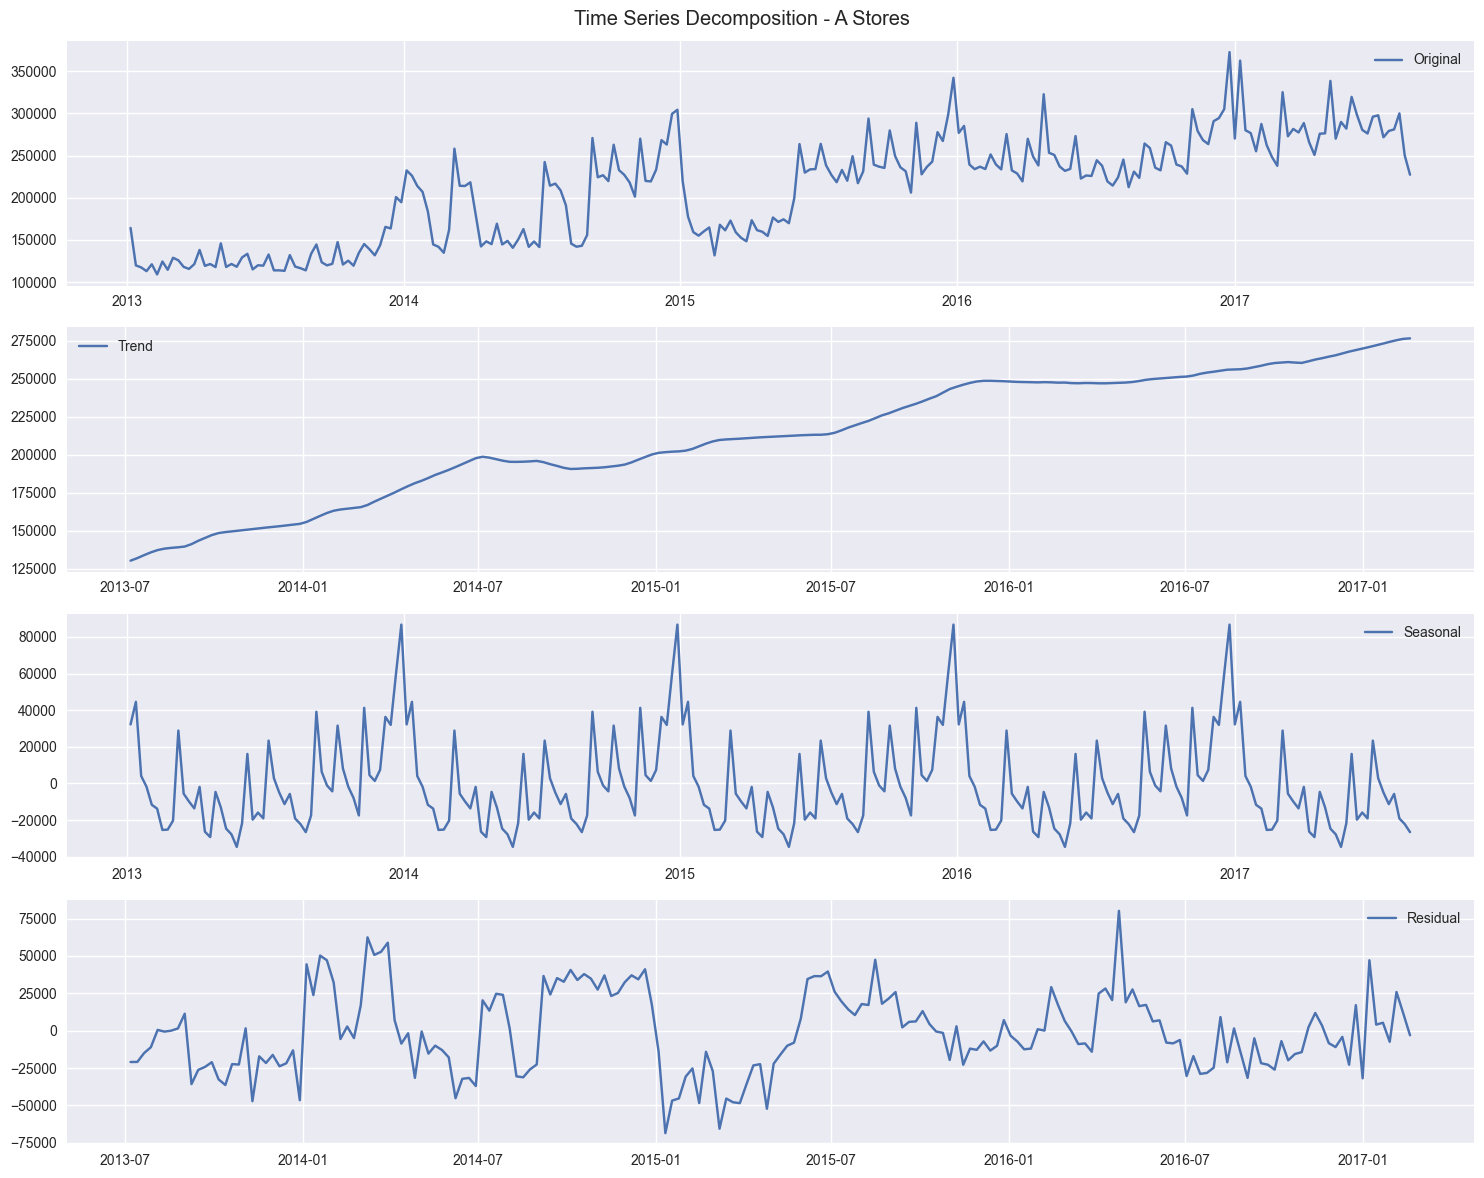

In [11]:
# Prepare data for decomposition
# We'll focus on total daily sales across all stores
daily_sales = df.groupby('date')['sales'].sum()

# Resample to weekly frequency to reduce noise
weekly_sales = daily_sales.resample('W').mean()

# Perform time series decomposition
decomposition = seasonal_decompose(weekly_sales, period=52)  # 52 weeks in a year

# Plot the decomposition
plt.figure(figsize=(15, 12))

plt.subplot(411)
plt.plot(weekly_sales, label='Original')
plt.legend()
plt.title('Time Series Decomposition of Weekly Sales')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Additional analysis: Seasonal patterns by store type
for store_type in df['type'].unique():
    store_type_sales = df[df['type'] == store_type].groupby('date')['sales'].sum()
    weekly_sales = store_type_sales.resample('W').mean()
    
    decomposition = seasonal_decompose(weekly_sales, period=52)
    
    plt.figure(figsize=(15, 12))
    plt.suptitle(f'Time Series Decomposition - {store_type} Stores')
    
    plt.subplot(411)
    plt.plot(weekly_sales, label='Original')
    plt.legend()
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend()
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## 7. Model Development

We'll implement and compare two time series forecasting models: SARIMA and Holt-Winters.

In [12]:
# Prepare data for modeling
# We'll focus on one store and one product family for this example
store_family = df[
    (df['store_nbr'] == 1) & 
    (df['family'] == 'GROCERY I')
].copy()

# Create features for modeling
store_family['oil_price'] = store_family['dcoilwtico']
store_family['promotion'] = store_family['onpromotion']
store_family['holiday'] = store_family['holiday']

# Prepare time series data
ts_data = store_family['sales'].resample('D').mean()
ts_data = ts_data.fillna(ts_data.mean())

# Split the data
train_size = int(len(ts_data) * 0.8)
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

# SARIMA Model
# Find optimal parameters using grid search
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [7]  # Weekly seasonality

best_aic = float('inf')
best_params = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            try:
                                model = SARIMAX(
                                    train_data,
                                    order=(p, d, q),
                                    seasonal_order=(P, D, Q, s)
                                )
                                results = model.fit(disp=False)
                                if results.aic < best_aic:
                                    best_aic = results.aic
                                    best_params = ((p, d, q), (P, D, Q, s))
                            except:
                                continue

print("Best SARIMA parameters:", best_params)

# Fit the model with best parameters
best_order, best_seasonal_order = best_params
sarima_model = SARIMAX(
    train_data,
    order=best_order,
    seasonal_order=best_seasonal_order
)
sarima_results = sarima_model.fit(disp=False)

# Holt-Winters Model
hw_model = ExponentialSmoothing(
    train_data,
    seasonal_periods=7,
    trend='add',
    seasonal='add'
)
hw_results = hw_model.fit()

# Generate forecasts
sarima_forecast = sarima_results.forecast(steps=len(test_data))
hw_forecast = hw_results.forecast(len(test_data))

# Calculate error metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

sarima_metrics = calculate_metrics(test_data, sarima_forecast)
hw_metrics = calculate_metrics(test_data, hw_forecast)

print("\nSARIMA Model Metrics:")
print(f"MAE: {sarima_metrics[0]:.2f}")
print(f"RMSE: {sarima_metrics[1]:.2f}")
print(f"MAPE: {sarima_metrics[2]:.2f}%")

print("\nHolt-Winters Model Metrics:")
print(f"MAE: {hw_metrics[0]:.2f}")
print(f"RMSE: {hw_metrics[1]:.2f}")
print(f"MAPE: {hw_metrics[2]:.2f}%")

Best SARIMA parameters: ((1, 1, 1), (1, 1, 1, 7))

SARIMA Model Metrics:
MAE: 372.08
RMSE: 590.24
MAPE: inf%

Holt-Winters Model Metrics:
MAE: 422.66
RMSE: 637.59
MAPE: inf%


## 8. Forecasting and Evaluation

Let's generate and visualize forecasts using the best performing model.

Using SARIMA model for forecasting


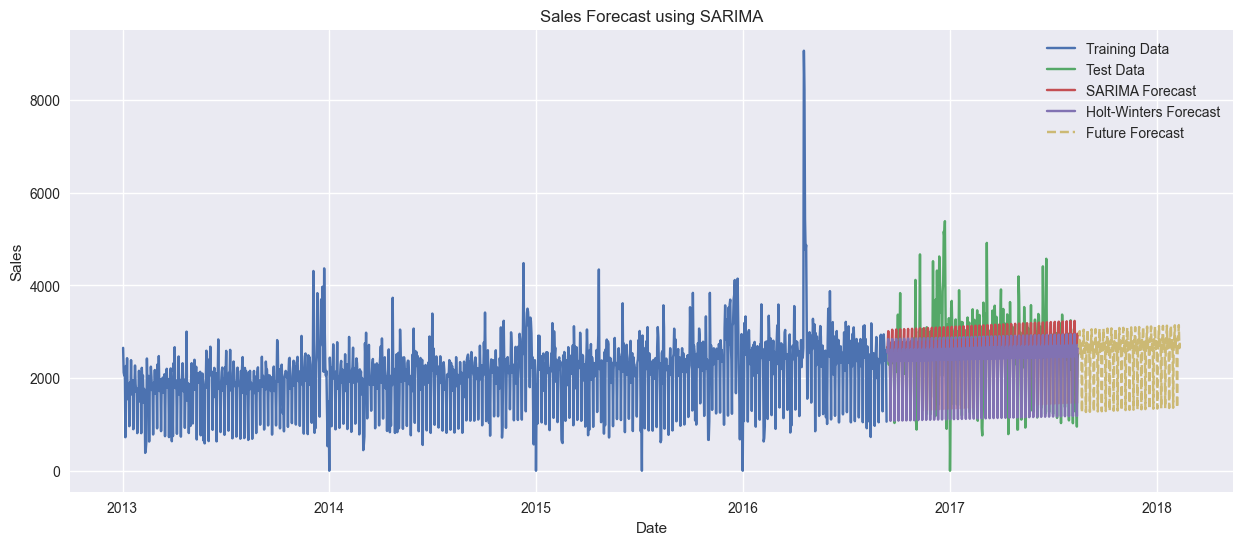


Monthly Sales Forecast Averages:
--------------------------------------------------
2017-08: 2,537.69
2017-09: 2,554.35
2017-10: 2,522.23
2017-11: 2,587.31
2017-12: 2,614.24
2018-01: 2,577.92
2018-02: 2,707.58


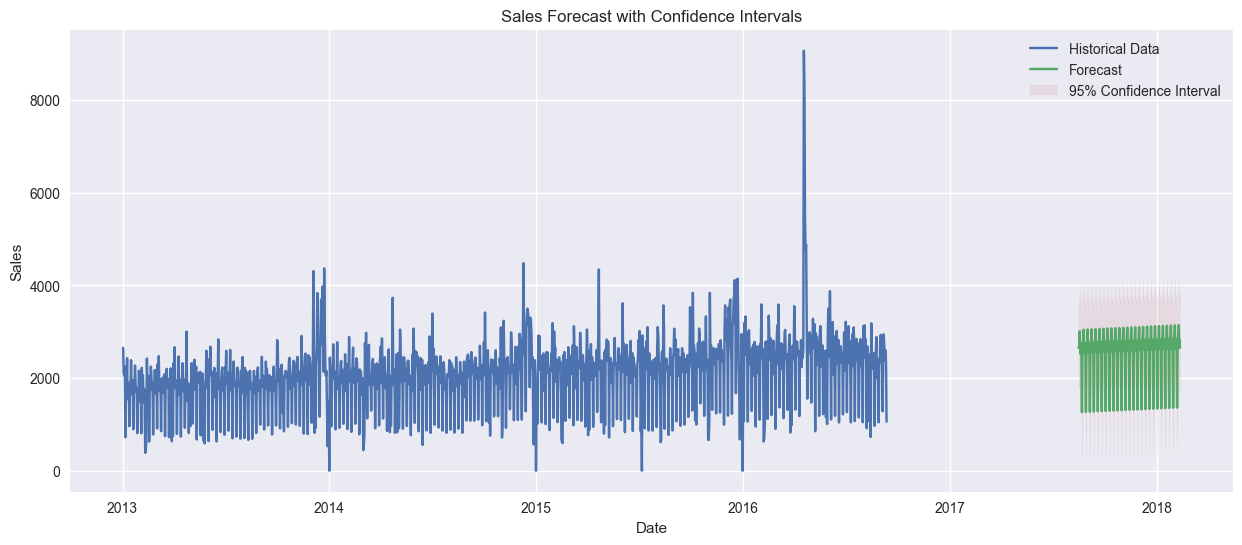

In [13]:
# Generate future forecasts (6 months ahead)
forecast_steps = 180  # 6 months * 30 days

# Use the model with better performance (comparing metrics above)
if sarima_metrics[1] < hw_metrics[1]:  # Compare RMSE
    print("Using SARIMA model for forecasting")
    future_forecast = sarima_results.forecast(steps=forecast_steps)
    model_name = "SARIMA"
else:
    print("Using Holt-Winters model for forecasting")
    future_forecast = hw_results.forecast(forecast_steps)
    model_name = "Holt-Winters"

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast')
plt.plot(test_data.index, hw_forecast, label='Holt-Winters Forecast')
plt.plot(pd.date_range(start=test_data.index[-1], periods=forecast_steps+1, freq='D')[1:],
         future_forecast, label='Future Forecast', linestyle='--')
plt.title(f'Sales Forecast using {model_name}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print monthly forecast averages
future_dates = pd.date_range(start=test_data.index[-1], periods=forecast_steps+1, freq='D')[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
monthly_forecast = future_df.set_index('Date').resample('M')['Forecast'].mean()

print("\nMonthly Sales Forecast Averages:")
print("-" * 50)
for date, forecast in monthly_forecast.items():
    print(f"{date.strftime('%Y-%m')}: {forecast:,.2f}")

# Calculate confidence intervals (for SARIMA model)
if model_name == "SARIMA":
    forecast_ci = sarima_results.get_forecast(steps=forecast_steps)
    ci = forecast_ci.conf_int()
    
    plt.figure(figsize=(15, 6))
    plt.plot(train_data.index, train_data, label='Historical Data')
    plt.plot(future_dates, future_forecast, label='Forecast')
    plt.fill_between(future_dates,
                     ci.iloc[:, 0],
                     ci.iloc[:, 1],
                     color='r',
                     alpha=.1,
                     label='95% Confidence Interval')
    plt.title(f'Sales Forecast with Confidence Intervals')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()